<a href="https://colab.research.google.com/github/Akasonal/Multiclass-Classification-using-NLP/blob/main/Multiclass_Classsification_in_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import csv
import tensorflow.keras as keras
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,Bidirectional,LSTM,Dropout

In [3]:
#Reading the textual data from csv
labels=[]
articles=[]
with open("bbc-text.csv","r") as f:
  text=csv.reader(f,delimiter=",")
  next(text) 
  for rows in text:
    labels.append(rows[0])
    articles.append(rows[1])

## Text Preprocessing

In [4]:
len(articles)

2225

In [5]:
len(labels)

2225

In [6]:
#removing stop words and other unwanted symbol present in text
filtered_sent=[]
for i in range(len(articles)):
  cleaned=re.sub(r"[^a-zA-Z]"," ",articles[i])   #taking only those words having alphabetical words
  cleaned=cleaned.split()                        #spliting the sentence into list of words
  cleaned=[word for word in cleaned if not word in set(stopwords.words("english")) if len(word)>2]  #removing stop words and taking those words having length greater than 2
  cleaned=" ".join(cleaned)  #joining list of sentence
  filtered_sent.append(cleaned)  #appending list of sentence into a single list

In [7]:
filtered_sent[:10]   #printing text upto 10th index

['future hands viewers home theatre systems plasma high definition tvs digital video recorders moving living room way people watch radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked technologies ces digital personal video recorders dvr pvr set top boxes like tivo sky system allow people record store play pause forward wind programmes want essentially technology allows much personalised also built high definition sets big business japan slower take europe lack high definition programming people forward wind adverts also forget abiding network channel schedules putting together carte entertainment networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty

In [8]:
len(filtered_sent)   #len of the text after text preprocessing steps

2225

#### splitting the dataset into train and test set and encoding text into numbers because machine cannot read numerical variables 

In [9]:
#initializing hyperparameter
vocab_size=5000 #tokenizing the textual data into numerical for first 10000 randomly occured word
oov_token="<oov>"  #Assignment for all those word which does not comes in vocabulary of 10000 words
len_sent=800     #as itis hyperparameter hence it depends upon you what should be the length of word
len_training=0.8  #percentage of data used for training of independent and dependent variable
train_size1=int(len(filtered_sent)*len_training)  #setting the size of training data
train_size2=int(len(labels)*len_training)
X_train=filtered_sent[0:train_size1]
X_test=filtered_sent[train_size1:]
Y_train=labels[0:train_size2]
Y_test=labels[train_size2:]

In [10]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

1780
445
1780
445


In [11]:
set(Y_train)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [12]:
X_train[0]

'future hands viewers home theatre systems plasma high definition tvs digital video recorders moving living room way people watch radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked technologies ces digital personal video recorders dvr pvr set top boxes like tivo sky system allow people record store play pause forward wind programmes want essentially technology allows much personalised also built high definition sets big business japan slower take europe lack high definition programming people forward wind adverts also forget abiding network channel schedules putting together carte entertainment networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty 

In [13]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(filtered_sent)  #fitting the tokenizer into text

In [ ]:
encoded_X_train=tokenizer.texts_to_sequences(X_train)
encoded_X_test=tokenizer.texts_to_sequences(X_test)
encoded_X_train[0]

In [15]:
padded_X_train=pad_sequences(encoded_X_train,maxlen=len_sent,padding="post")
padded_X_test=pad_sequences(encoded_X_test,maxlen=len_sent,padding="post")
padded_X_train.shape

(1780, 800)

In [16]:
label_tokenizer=Tokenizer()
label_tokenizer.fit_on_texts(labels)
encoded_Y_train=label_tokenizer.texts_to_sequences(Y_train)
encoded_Y_test=label_tokenizer.texts_to_sequences(Y_test)

In [22]:
encoded_Y_train.shape

(1780, 1)

In [18]:
import numpy as np
import tensorflow as tf
encoded_Y_train=np.array(encoded_Y_train).reshape(-1,1)
encoded_Y_test=np.array(encoded_Y_test).reshape(-1,1)

## Creating the lstm layers  and applying  bi-directional lstm

In [24]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=50,input_length=len_sent))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50,return_sequences=False)))
model.add(Dropout(0.3))
model.add(Dense(6,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 800, 50)           250000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 800, 50)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 800, 100)          40400     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 800, 100)          60400     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100)               60400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                

In [27]:
model.compile(loss=["sparse_categorical_crossentropy"],optimizer="adam",metrics=["accuracy"])

In [28]:
model.fit(x=padded_X_train,y=encoded_Y_train,validation_data=(padded_X_test,encoded_Y_test),epochs=10,batch_size=50,verbose=1)

Epoch 1/10
36/36 [==============================] - 120s 3s/step - loss: 1.6963 - accuracy: 0.2235 - val_loss: 1.2221 - val_accuracy: 0.4494
Epoch 2/10
36/36 [==============================] - 107s 3s/step - loss: 1.0056 - accuracy: 0.5735 - val_loss: 0.6708 - val_accuracy: 0.7596
Epoch 3/10
36/36 [==============================] - 108s 3s/step - loss: 0.4356 - accuracy: 0.8174 - val_loss: 0.3643 - val_accuracy: 0.9034
Epoch 4/10
36/36 [==============================] - 107s 3s/step - loss: 0.2173 - accuracy: 0.9446 - val_loss: 0.3022 - val_accuracy: 0.9034
Epoch 5/10
36/36 [==============================] - 107s 3s/step - loss: 0.1299 - accuracy: 0.9727 - val_loss: 0.3045 - val_accuracy: 0.9169
Epoch 6/10
36/36 [==============================] - 107s 3s/step - loss: 0.0482 - accuracy: 0.9961 - val_loss: 0.2984 - val_accuracy: 0.9258
Epoch 7/10
36/36 [==============================] - 107s 3s/step - loss: 0.0345 - accuracy: 0.9957 - val_loss: 0.3094 - val_accuracy: 0.9236
Epoch 8/10
36

In [32]:
predicted=model.predict_classes(padded_X_test)
predicted[0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


5

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics
import scikitplot as splt
print(accuracy_score(predicted,encoded_Y_test))

0.9213483146067416


#### 92.13% accuracy this quite good enough for our prediction

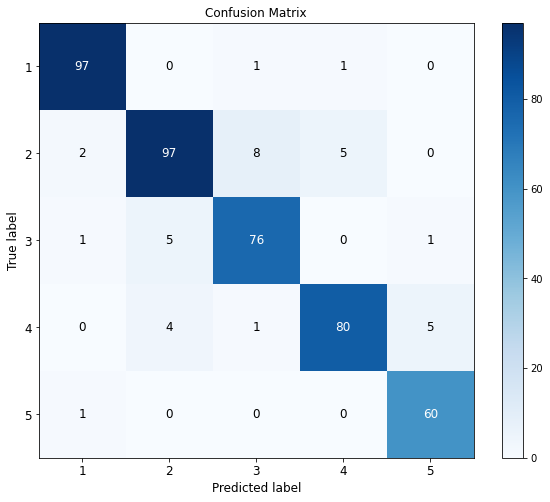

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
splt.metrics.plot_confusion_matrix(predicted,encoded_Y_test,figsize=(10,8),text_fontsize="large")
plt.show()

In [59]:
# predicting for any kind of text data
def predict(data):
  list1=['None','business', 'entertainment', 'politics', 'sport', 'tech']
  data=tokenizer.texts_to_sequences(data)
  data=pad_sequences(data,maxlen=250,padding="post")
  index=model.predict(data)
  predicted=list1[np.argmax(index)]
  return predicted

In [68]:
#let's do predicted using various data

In [63]:
predict(["A spectacular Projection Mapping show underway at the Victoria Memorial. This show traces the exemplary life of Netaji Subhas Bose"])

'entertainment'